In [1]:
import matplotlib.pyplot as plt
from pyLMS import *

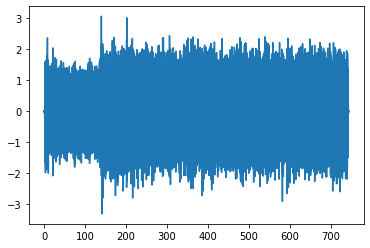

In [3]:
data = pyLMS('data/accelerometro.mat')#, 'Time')
plt.plot(data['signals']['x'], data['signals']['y'])

In [ ]:
data = pyLMS('data/microfono.mat', 'Time')
plt.plot(data['signals']['x'], data['signals']['y'])
data['mags']

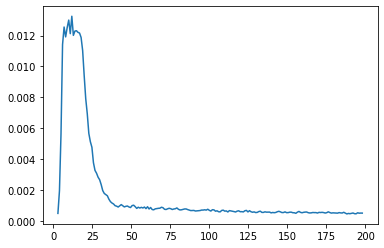

In [5]:
data = pyLMS('data/psd.mat')#, 'PSD')
plt.plot(data['signals']['x'], data['signals']['y'])

In [ ]:
data = pyLMS('data/FRF.mat', 'FRF')
plt.plot(data['signals']['x'],data['signals']['y'])

In [ ]:
data = pyLMS('data/terzi_ottava.mat', 'Octave')
plt.bar(data['signals']['x'],data['signals']['y'], width = 100)

In [ ]:
mat = scipy.io.loadmat('data/spectrum.mat')

In [ ]:
data = pyLMS('data/spectrum.mat', 'Spectrum')
data['signals']['y']

In [ ]:
list(mat.keys())[3]